In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np

#_ = plt.xkcd();
fig = plt.figure();

# https://stackoverflow.com/questions/27934885/how-to-hide-code-from-cells-in-ipython-notebook-visualized-with-nbviewer
from IPython.display import HTML

HTML('''<script>
  function code_toggle() {
    if (code_shown){
      $('div.input').hide('500');
      $('#toggleButton').val('Show Code')
    } else {
      $('div.input').show('500');
      $('#toggleButton').val('Hide Code')
    }
    code_shown = !code_shown
  }

  $( document ).ready(function(){
    code_shown=false;
    $('div.input').hide()
  });
</script>
<form action="javascript:code_toggle()"><input type="submit" id="toggleButton" value="Show Code"></form>''')

# Dealing with Sparsity

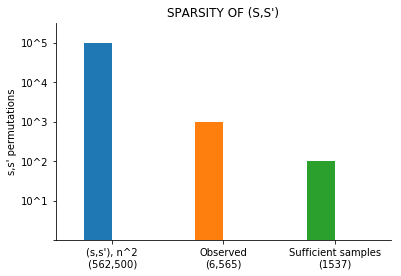

In [7]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.bar([-0.125, -0.125], [0, 100], .25)
ax.bar([.875, .875], [0, 60], .25)
ax.bar([1.875, 1.875], [0, 40], .25)
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.set_xticks([0, 1, 2])
ax.set_yticks([0, 20, 40, 60, 80, 100])
ax.set_xlim([-0.5, 2.5])
ax.set_ylim([0, 110])
ax.set_xticklabels(['(s,s\'), n^2\n (562,500)', 'Observed\n(6,565)','Sufficient samples\n(1537)'])
ax.set_yticklabels(['','10^1', '10^2','10^3','10^4','10^5','10^6'])
ax.set_ylabel("s,s' permutations")


plt.title("SPARSITY OF (S,S')")

plt.show()

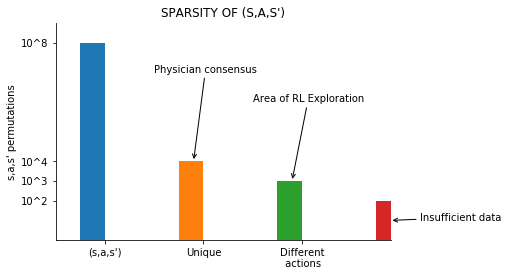

In [6]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.bar([-0.125, -0.125], [0, 100], .25)
ax.bar([.875, .875], [0, 40], .25)
ax.bar([1.875, 1.875], [0, 30], .25)
ax.bar([2.875, 2.875], [0, 20], .25)

ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.set_xticks([0, 1, 2,3])
ax.set_yticks([ 20,30, 40, 100])
ax.set_xlim([-0.5, 2.9])
ax.set_ylim([0, 110])
ax.set_xticklabels(['(s,a,s\')', 'Unique','Different\n actions','NO DATA\n'])
ax.set_yticklabels(['10^2','10^3','10^4','10^8'])
ax.set_ylabel("s,a,s' permutations")
plt.annotate(
    'Physician consensus',
    xy=(0.9,40), arrowprops=dict(arrowstyle='->'), xytext=(.5, 85))


plt.annotate(
    'Area of RL Exploration',
    xy=(1.9,30), arrowprops=dict(arrowstyle='->'), xytext=(1.5, 70))

plt.annotate(
    'Insufficient data',
    xy=(2.9,10), arrowprops=dict(arrowstyle='->'), xytext=(3.2, 10))

plt.title("SPARSITY OF (S,A,S')")

plt.show()

## Restrict actions to where doctors disagree. Here's how:

```
import restrictactions as ra

# Create the RestrictActions object. Provide number of states and actions
restrict_actions = ra.RestrictActions(n_states,n_actions)

# Provide the list of episodes to examine by episodes or numpy array
restrict_actions.load_sas_as_episodes(episodes)
# -- OR --
restrict_actions.load_sas_as_array(testArray)

# Get set of actions for a given state
actions = restrict_actions.get_actions(cur_state,min_freq=30)

# (Optional) Get count of all actions for a given state
all_actions = restrict_actions.get_actions_per_state(state)
```

Full sample:

https://github.com/dtak/cs282-f17-xuefeng-yi-david/blob/master/playground/RestrictedActionsTest.ipynb

Class code:

https://github.com/dtak/cs282-f17-xuefeng-yi-david/blob/master/playground/restrictactions.py